In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1af7Z3icx_nHKy5-0g37EUtLp-hXqiQP4')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12
1,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12
2,2008-12-03,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12
3,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12
4,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12
5,2008-12-06,2,14.6,29.7,0.2,NaN,NaN,14,56.0,13,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,12
6,2008-12-07,2,14.3,25.0,0.0,NaN,NaN,13,50.0,12,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,12
7,2008-12-08,2,7.7,26.7,0.0,NaN,NaN,13,35.0,10,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,12
8,2008-12-09,2,9.7,31.9,0.0,NaN,NaN,6,80.0,9,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.0,12
9,2008-12-10,2,13.1,30.1,1.4,NaN,NaN,13,28.0,8,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,12


In [ ]:
df.drop(columns=['Date'], inplace=True)

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n")

Column 'Location' has 49 unique values:
[ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]


Column 'MinTemp' has 390 unique values:
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.   0.8 -0.1  1.3  3.

In [ ]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
dtype: int64

tính tỉ lệ % các dữ liệu bị thiếu cho từng feature

In [ ]:
(df.isnull().sum()/len(df))*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       0.000000
WindGustSpeed     7.055548
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Month             0.000000
dtype: float64

In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [ ]:
LE = LabelEncoder()
nume_list = ['Location','WindDir9am', 'WindDir3pm', 'WindGustDir']
for col in nume_list:
    df[col] = LE.fit_transform(df[col])
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12
5,2,14.6,29.7,0.2,NaN,NaN,14,56.0,13,13,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,12
6,2,14.3,25.0,0.0,NaN,NaN,13,50.0,12,13,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,12
7,2,7.7,26.7,0.0,NaN,NaN,13,35.0,10,13,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,12
8,2,9.7,31.9,0.0,NaN,NaN,6,80.0,9,7,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.0,12
9,2,13.1,30.1,1.4,NaN,NaN,13,28.0,8,10,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,12


In [ ]:
missing_values = [ 'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
'WindSpeed3pm','Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']


for column in missing_values:
    # Check if the target column has missing values
    if df[column].isna().any():
        # Create a DataFrame without missing values in the selected column
        data_without_na = df.dropna()

        # Split the data into features (X) and target variable (y)
        X = data_without_na.drop(columns=[column])
        y = data_without_na[column]

        prediction_set = df[df[column].isna()]

        # Initialize the linear regression model
        model = LinearRegression()

        # Fit the model
        model.fit(X, y)

        # Predict missing values using the trained model
        predicted_values = model.predict(prediction_set.drop(columns=[column]))

        # Fill missing values in the original DataFrame
        df.loc[df[column].isna(), column] = predicted_values


In [ ]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

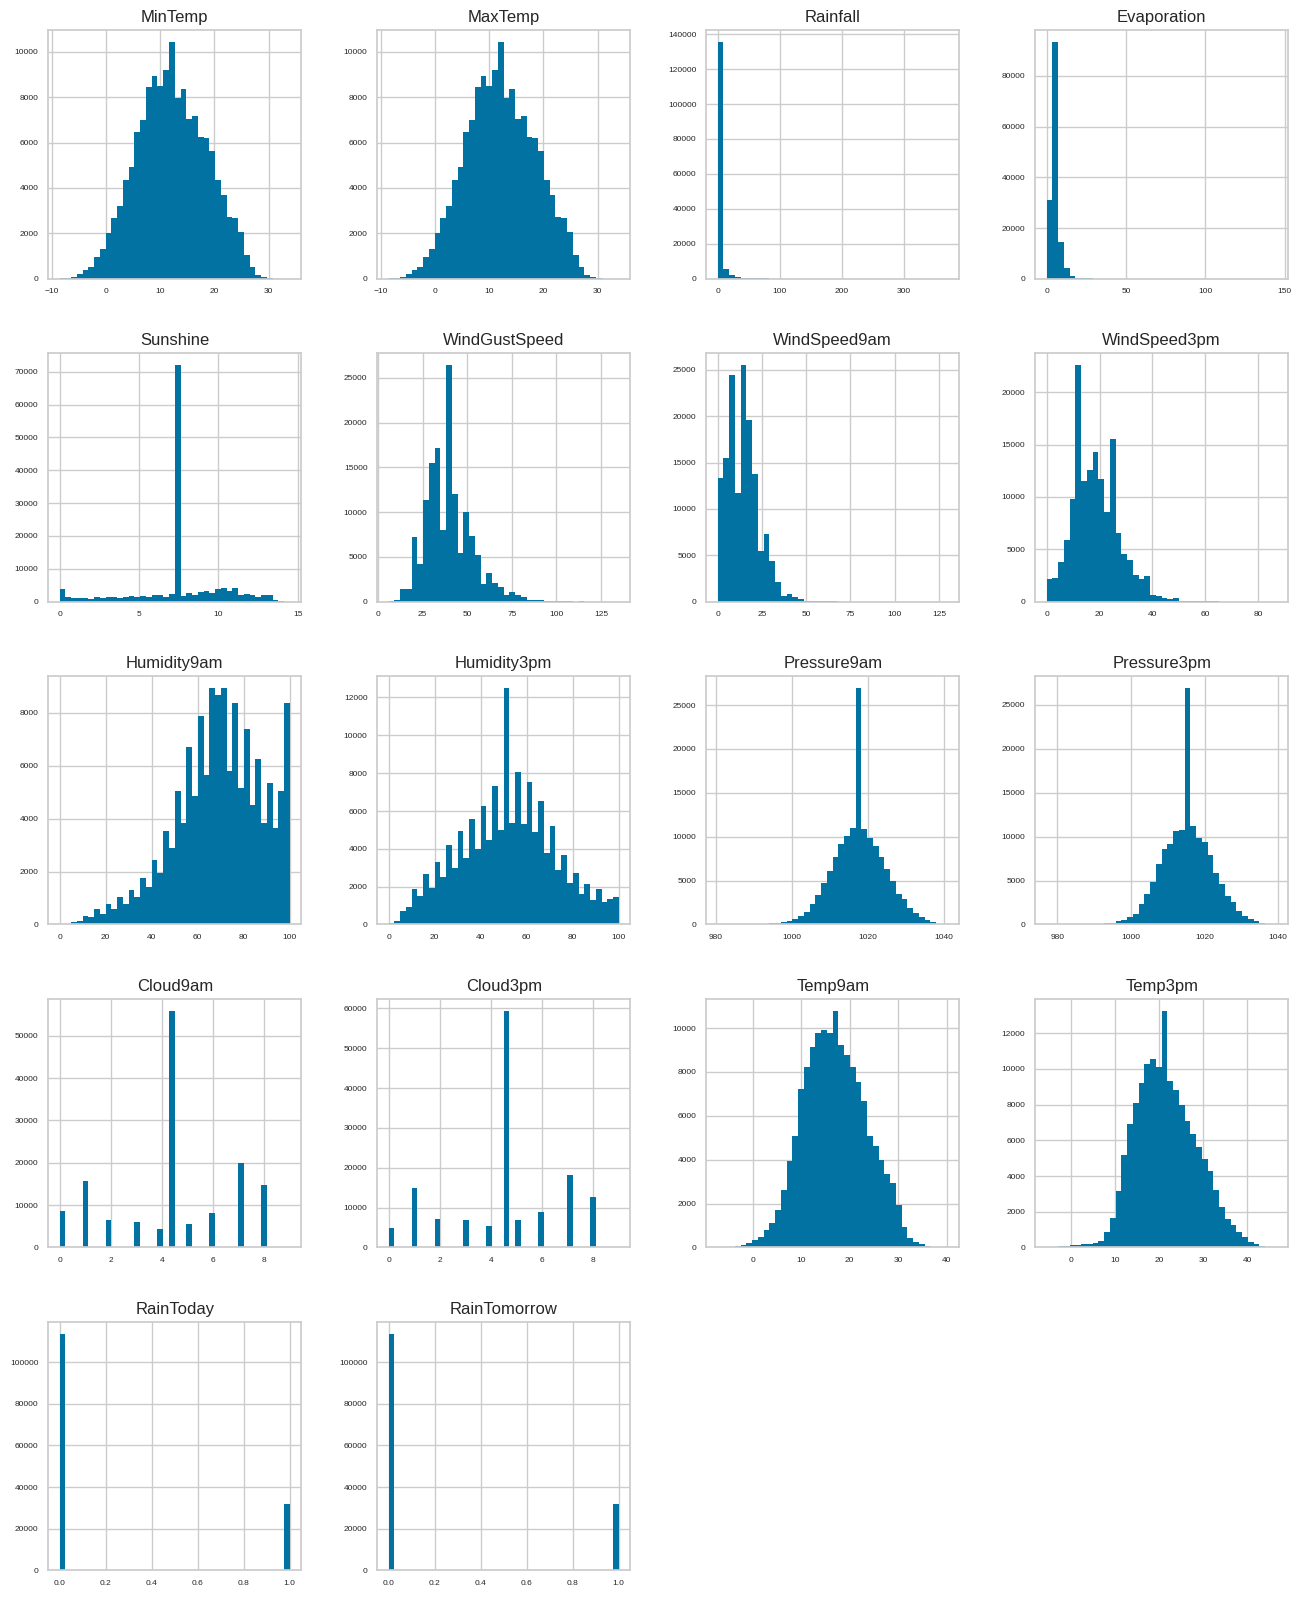

In [ ]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

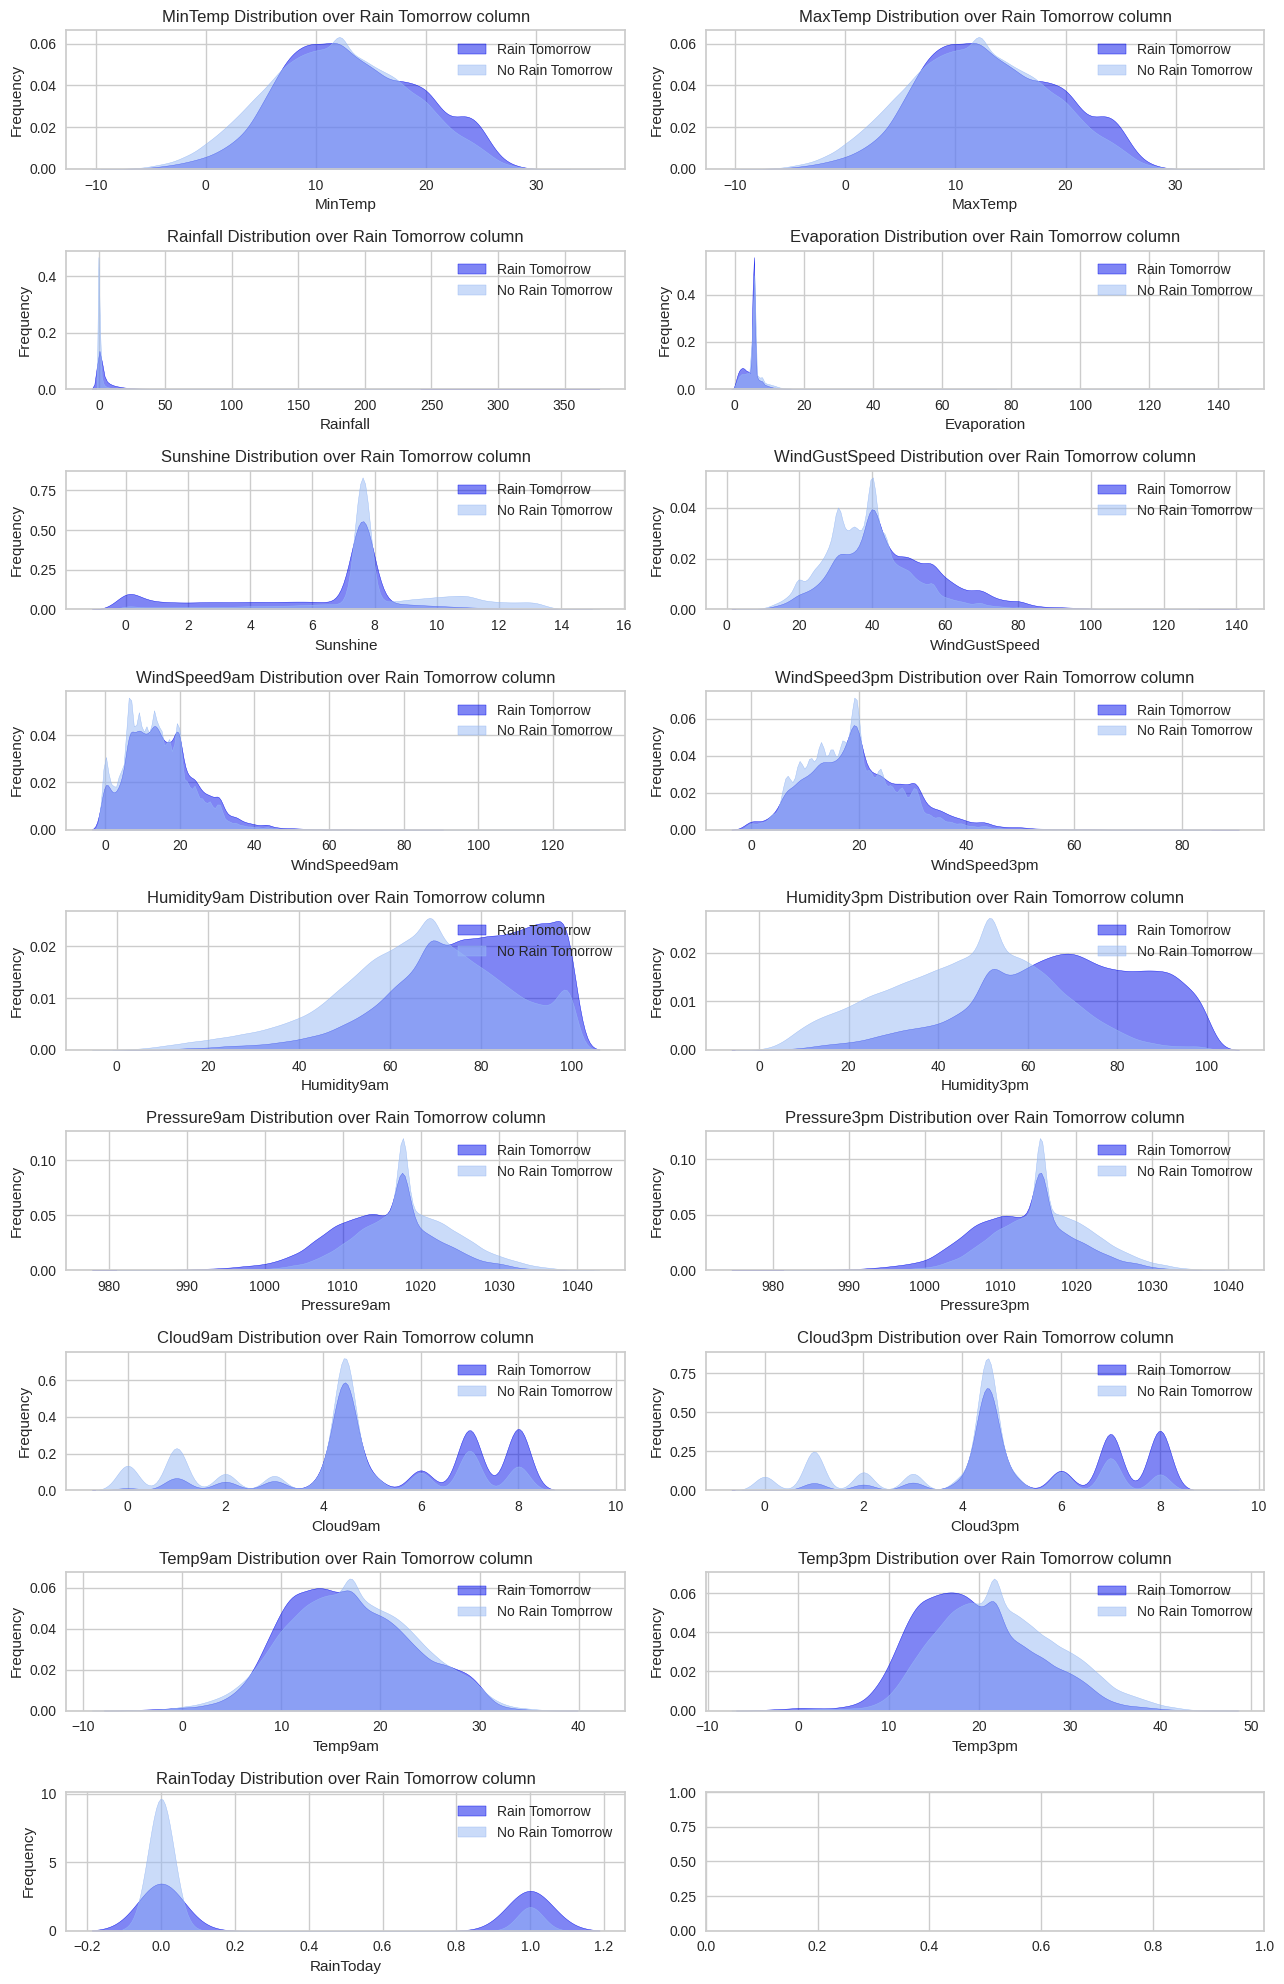

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
fig, axes = plt.subplots(nrows=len(df_num.columns) // 2, ncols=2, figsize=(13, 20))

for idx, column in enumerate(df_num.drop(columns = 'RainTomorrow')):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.kdeplot(df[df["RainTomorrow"] == 1][column], alpha=0.5, fill=True, color="#000CEB",
                label="Rain Tomorrow", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["RainTomorrow"] == 0][column], alpha=0.5, fill=True, color="#97B9F4",
                label="No Rain Tomorrow", ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Rain Tomorrow column")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

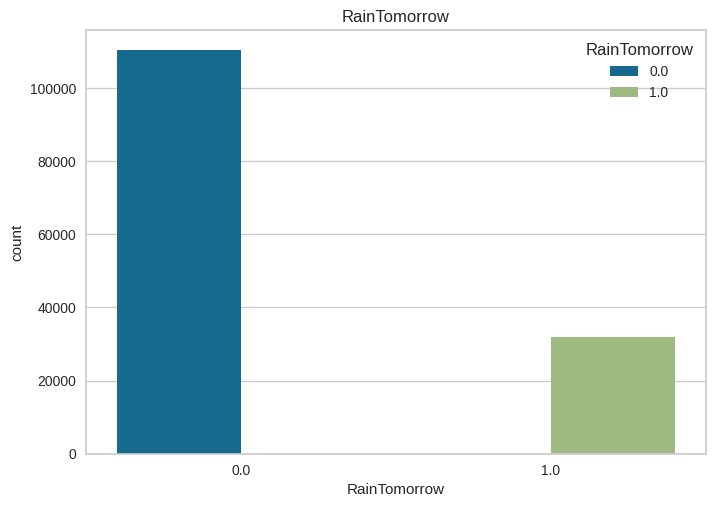

In [ ]:
categorical_list = ["RainTomorrow"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "RainTomorrow")
    plt.title(i)

In [ ]:
ex.pie(df,names='RainTomorrow',title='Propotion Of Different Class',hole=0.33)

In [ ]:
df["RainTomorrow"].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

***Heatmap***

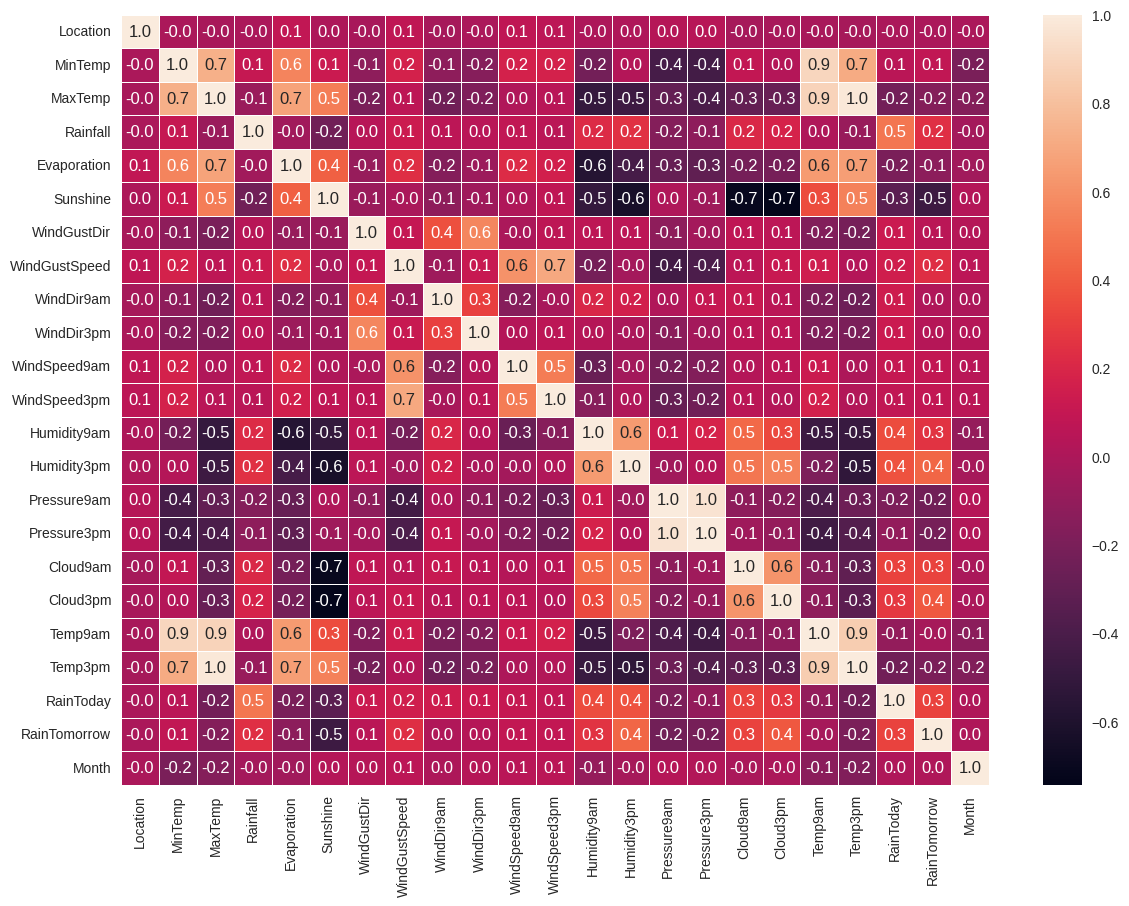

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [ ]:
corr = df.corr()
corr["RainTomorrow"].sort_values()

Sunshine        -0.460112
Pressure9am     -0.236920
Pressure3pm     -0.217647
Temp3pm         -0.193217
MaxTemp         -0.159186
Evaporation     -0.127351
Temp9am         -0.026370
Location        -0.002655
Month            0.007439
WindDir9am       0.017641
WindDir3pm       0.034323
WindGustDir      0.053784
MinTemp          0.084974
WindSpeed3pm     0.088417
WindSpeed9am     0.092539
WindGustSpeed    0.233214
Rainfall         0.238525
Humidity9am      0.254729
Cloud9am         0.312860
RainToday        0.314776
Cloud3pm         0.389103
Humidity3pm      0.436161
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

***Train Test Split***

In [ ]:
x = df.drop(["RainTomorrow"], axis = 1)
y = df.loc[:,"RainTomorrow"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

***Balancing***

In [ ]:
threshold = 0.5
y = (y > threshold).astype(int)
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 113137, 1: 32323})
Resampled dataset shape Counter({0: 113137, 1: 113137})


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

***Detect Outliner***

In [ ]:
# outlier detection
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [ ]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold = np.quantile(x_score , .10)
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
threshold

-1.145955231142396

In [ ]:
len(outlier_index)

14546

In [ ]:
df.drop(outlier_index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130914 entries, 1 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       130914 non-null  int64  
 1   MinTemp        130914 non-null  float64
 2   MaxTemp        130914 non-null  float64
 3   Rainfall       130914 non-null  float64
 4   Evaporation    130914 non-null  float64
 5   Sunshine       130914 non-null  float64
 6   WindGustDir    130914 non-null  int64  
 7   WindGustSpeed  130914 non-null  float64
 8   WindDir9am     130914 non-null  int64  
 9   WindDir3pm     130914 non-null  int64  
 10  WindSpeed9am   130914 non-null  float64
 11  WindSpeed3pm   130914 non-null  float64
 12  Humidity9am    130914 non-null  float64
 13  Humidity3pm    130914 non-null  float64
 14  Pressure9am    130914 non-null  float64
 15  Pressure3pm    130914 non-null  float64
 16  Cloud9am       130914 non-null  float64
 17  Cloud3pm       130914 non-nul

***Decision Tree***

In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(1, 30)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(x_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(x_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 1: Test Score = 0.759450931171942
Max Depth = 2: Test Score = 0.759450931171942
Max Depth = 3: Test Score = 0.7771020974570654
Max Depth = 4: Test Score = 0.8017536261346863
Max Depth = 5: Test Score = 0.8047234768466549
Max Depth = 6: Test Score = 0.8136949008723936
Max Depth = 7: Test Score = 0.8203417096087045
Max Depth = 8: Test Score = 0.829878819484342
Max Depth = 9: Test Score = 0.8390446980209834
Max Depth = 10: Test Score = 0.8452584035284655
Max Depth = 11: Test Score = 0.8481398658263875
Max Depth = 12: Test Score = 0.8516930800710643
Max Depth = 13: Test Score = 0.8524620592732705
Max Depth = 14: Test Score = 0.8528067740880525
Max Depth = 15: Test Score = 0.851940567630395
Max Depth = 16: Test Score = 0.8514367536703289
Max Depth = 17: Test Score = 0.851728435436683
Max Depth = 18: Test Score = 0.8500844109354145
Max Depth = 19: Test Score = 0.8487143905176909
Max Depth = 20: Test Score = 0.8472383040031113
Max Depth = 21: Test Score = 0.8473001758929439
Max De

In [ ]:
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=14, random_state=42)
# Train the model on the training set
dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy*100}%")
print("F1 score :",f1_score(y_test, y_pred,)*100, "%")
print("precision score :",precision_score(y_test, y_pred,)*100, "%")
print("recall score :",recall_score(y_test, y_pred,)*100, "%")

Decision Tree Accuracy: 85.28067740880525%
F1 score : 85.3531755455289 %
precision score : 85.40951576279242 %
recall score : 85.29690960869107 %


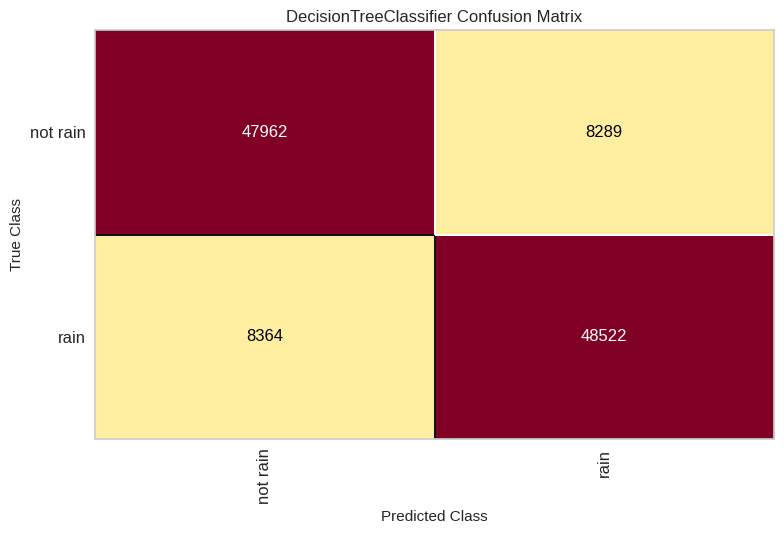

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
dt_cm = ConfusionMatrix(dt_classifier, classes=['not rain', 'rain'])

dt_cm.fit(x_train, y_train)
dt_cm.score(x_test, y_test)
dt_cm.show()

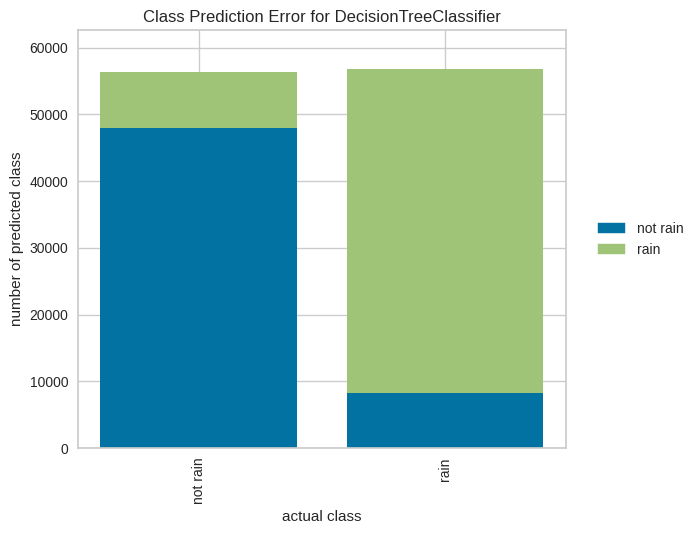

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(dt_classifier, classes=['not rain', 'rain'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test.ravel())
visualizer.show()

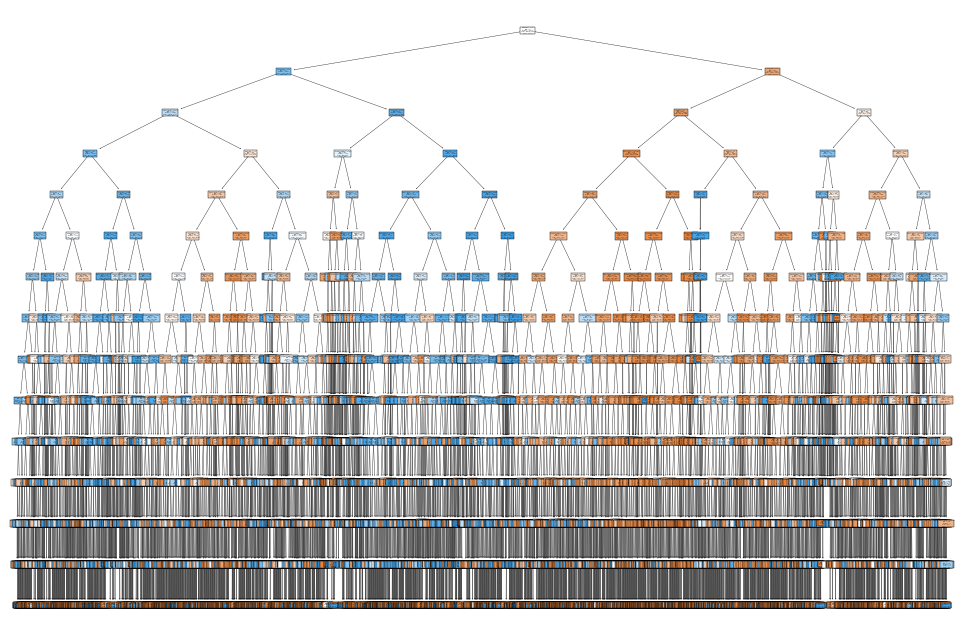

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=x.columns, class_names=['not rain', 'rain'])
plt.show()

***Random Forest***

In [ ]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))


Accuracy : 0.908


In [ ]:
# Get the number of trees used
num_trees_used = r_forest.n_estimators

print('Number of trees used: %d' % num_trees_used)

Number of trees used: 100


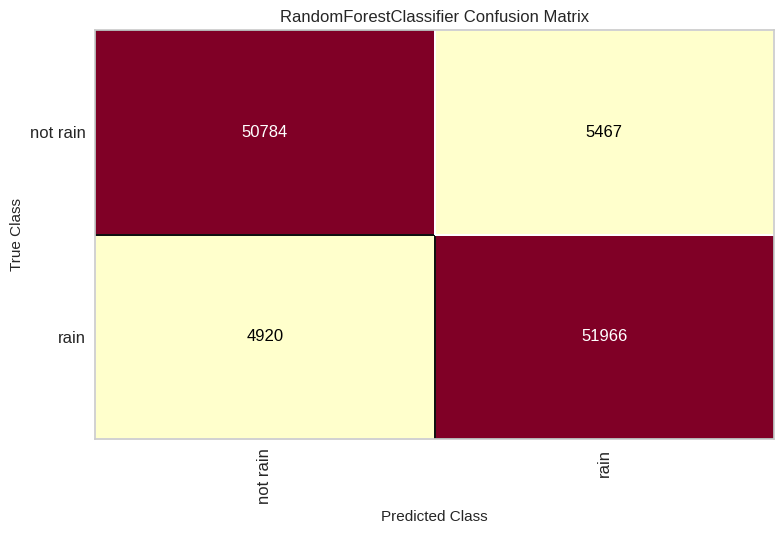

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
r_forest_cm = ConfusionMatrix(r_forest, classes=['not rain', 'rain'])

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

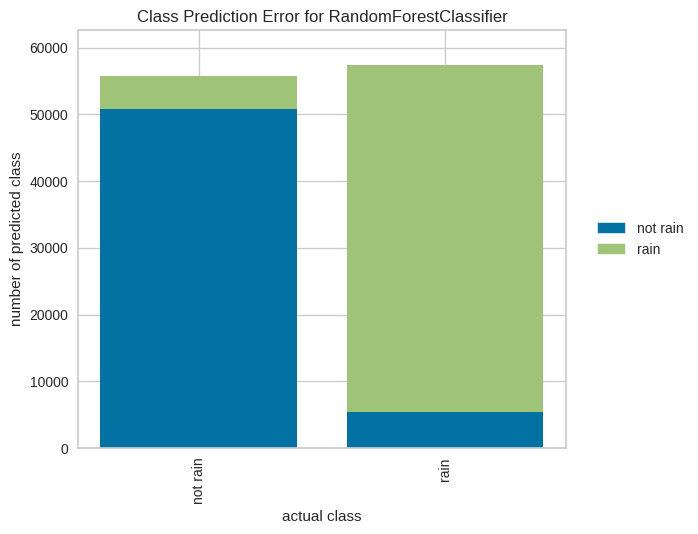

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(r_forest, classes=['not rain', 'rain'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test.ravel())
visualizer.show()

***KNN***

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))

Accuracy : 0.882


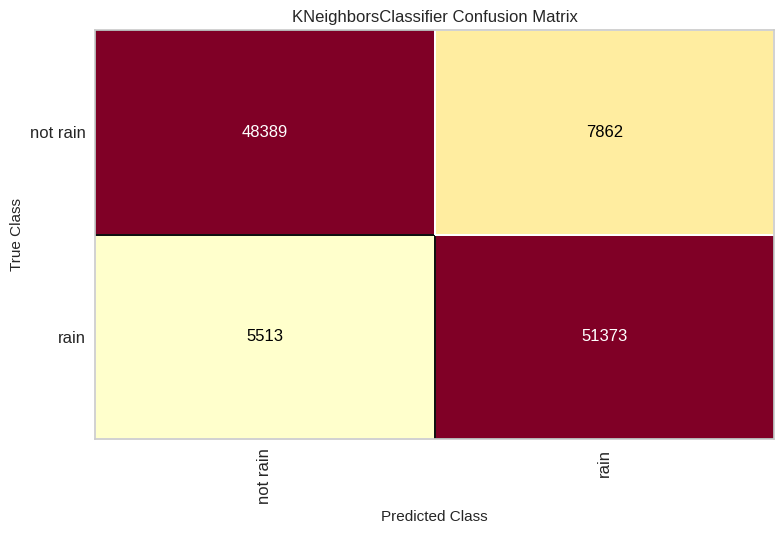

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
KNN_cm = ConfusionMatrix(KNN, classes=['not rain', 'rain'])

KNN_cm.fit(x_train, y_train)
KNN_cm.score(x_test, y_test)
KNN_cm.show()

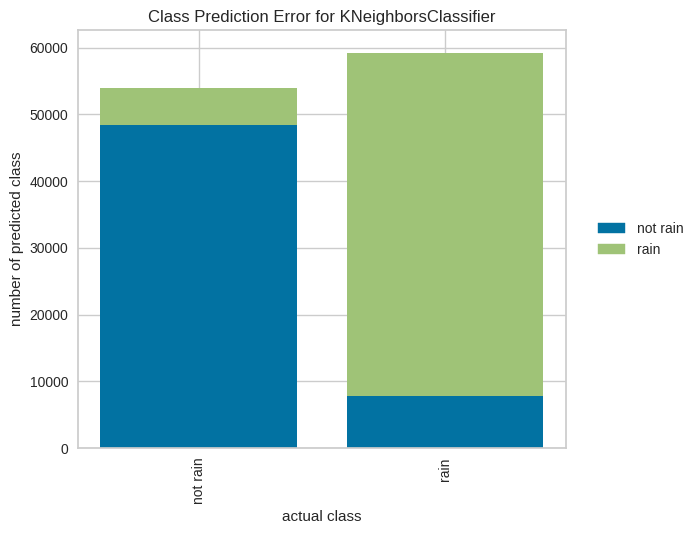

<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(KNN, classes=['not rain', 'rain'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test.ravel())
visualizer.show()

***Testing***

In [ ]:
testdata = pd.read_csv('https://drive.google.com/uc?export=download&id=1iHGNDQV8J4MldxLZcqTU3EMbP222EQAo')
testdata.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Sale,14.6,24.8,0.0,6.2,4.6,SSE,35,W,SSE,...,53,1008.2,1008.4,8,4,17.1,22.3,No,No,1
1,Sale,11.9,24.7,0.0,4.8,12.4,E,41,E,E,...,55,1012.0,1009.7,4,4,19.3,23.6,No,No,1
2,Sale,12.8,33.4,0.0,7.2,5.5,E,35,NNW,E,...,30,1010.4,1008.4,6,6,21.2,32.2,No,No,1
3,Sale,14.5,34.3,0.0,7.2,10.8,SSW,48,NNE,SE,...,27,1009.1,1007.2,1,5,25.7,32.7,No,No,1
4,Sale,18.5,24.8,0.0,7.6,1.9,SE,46,SSW,SSE,...,58,1019.6,1018.6,7,7,19.3,24.0,No,Yes,1
5,Sale,18.4,26.0,4.0,2.4,2.8,ESE,59,E,ESE,...,72,1017.6,1014.1,8,6,20.5,23.5,Yes,No,1
6,Sale,18.8,26.7,0.0,5.8,1.7,E,31,E,E,...,67,1012.3,1009.6,7,8,21.7,26.1,No,Yes,1
7,Sale,19.9,23.1,3.2,2.2,0.4,ENE,46,ENE,E,...,93,1007.3,1007.3,6,8,22.7,21.1,Yes,Yes,1
8,Sale,20.0,28.3,12.0,2.2,0.1,ESE,33,S,E,...,78,1009.0,1007.3,8,8,22.1,26.5,Yes,Yes,1
9,Sale,21.5,23.7,6.2,3.4,0.5,WSW,41,ENE,W,...,92,1001.9,1003.4,8,8,21.9,20.6,Yes,Yes,1


In [ ]:
LE = LabelEncoder()
nume_list = ['Location','WindDir9am', 'WindDir3pm', 'WindGustDir']
for col in nume_list:
    testdata[col] = LE.fit_transform(testdata[col])

In [ ]:
testdata['RainToday'] = testdata['RainToday'].map({'Yes': 1, 'No': 0})

In [ ]:
testdata = testdata.drop('RainTomorrow', axis = 1)

True Class: 0 0 0 0 1 0 1 1 1 1

In [ ]:
y_pred__2 = dt_classifier.predict(testdata)
print(y_pred__2)

[0 0 0 0 0 1 1 1 1 1]


In [ ]:
y_pred_2 = r_forest.predict(testdata)
print(y_pred_2)

[0 0 0 0 0 1 1 1 1 1]


In [ ]:
y_pred2 = KNN.predict(testdata)
print(y_pred2)

[0 0 0 0 0 0 0 1 1 1]
